# Here we estimate the total number of bikes rented per day

## Bussiness Case:-
* Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

* Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


## Domain Analysis

In [1]:
# import the total python libraries for this project
import numpy as np  # use for numerical function
import pandas as pd  # use for data cleaning and data analysis
import matplotlib.pyplot as plt  # use data visualization
import seaborn as sns  # use for data visualization
import warnings # use for warnings the ignore
warnings.filterwarnings("ignore") # call the warning

In [2]:
# load the data set
data = pd.read_csv("day.csv")
data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

####   Atribute Information:-
**instant:-**
  Here we can see the total number of data recored in dataset.\
**dteday:-**
  Here we can see the how many user registred based on date.\
**season:-**
  Here we can see the which season current active and user rent the bike.\
**yr:-**
  Here we can see the current year show.\
**mnth:-**
  Here we can see the user rent the bike on which month.\
**holiday:-**
  Here we can see the bike rent which day holiday or not.\
**weekday:-**
  Here we can see the assighn the how many day in one week.\
**workingday:-**
  Here we can see the 0 mean no workig day or 1 mean working day.\
**weathersit:-**
  Here we can see the show the weather is clean or not.\
**temp:-**
  Here we can see the show the temperature is normal or not.\
**atemp:-**
  Here we can see the show the apperent or fill like tempreature.\
**hum:-**
  Here we can see the how many humidity in weather.\
**windspeed:-**
  Here we can see the How many wind speed in air.\
**casual:-**
  Here we can see the how mnay user is comming casual.\
**registred:-**
  Here we can see the how many user is comming registred.\
**cnt:-**
  Here show the total how many bike rented per days.

## Basic Check

In [3]:
data.head() # showning the top 5 data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
data.tail() # showing the last 5 data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [5]:
data.describe() # use for continous column show information

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

**Insights:-**
* Here we can see the not null value in any column.
* Here we can see the min season is 1 or max is 4.
* Here we can see the instant inside all unique value after this column is delete.
* Here we can see the min to max weekday 0 to 6. Here we can see the weathersit min to max is 0 to 3.

In [6]:
data.describe(include="O")  # use for categorical column show information

dteday
count          731
unique         731
top     2011-01-01
freq             1

**Insights:-**
* Here we can see the most of bike rent on 2011-01-01 date.

In [7]:
data.info() # used for show dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insights:-**
* Here we can see the total 731 data in this dataset.
* Here we can not see the any null value in any columns.
* Here we can see the total float datatype column is 4 and object type column is 1.
* Here we should change the dteday column datatype object to datetime64.
* Here total storage data is 91.5 kb.

## EDA:- Exploratory Data Analysis

**Exploratory Data Analysis (EDA):-**  EDA in machine learning is the process of analyzing and visualizing datasets to summarize their main characteristics, often using statistical graphics and visualization techniques.

**There is a Three types of EDA :-**
  
1. Univariant Analysis
2. Biavariant Analysis
3. Multivariant Analysis

In [8]:
# store the all column in one variable
for column in data: # use the of loop for store the dataset columns
    print(column)

instant
dteday
season
yr
mnth
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


In [9]:
data["dteday"] = data["dteday"].astype("datetime64[ns]") # change the datatype of dteday column

In [10]:
data.info() # check the dataset column information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Univeriant Analysis

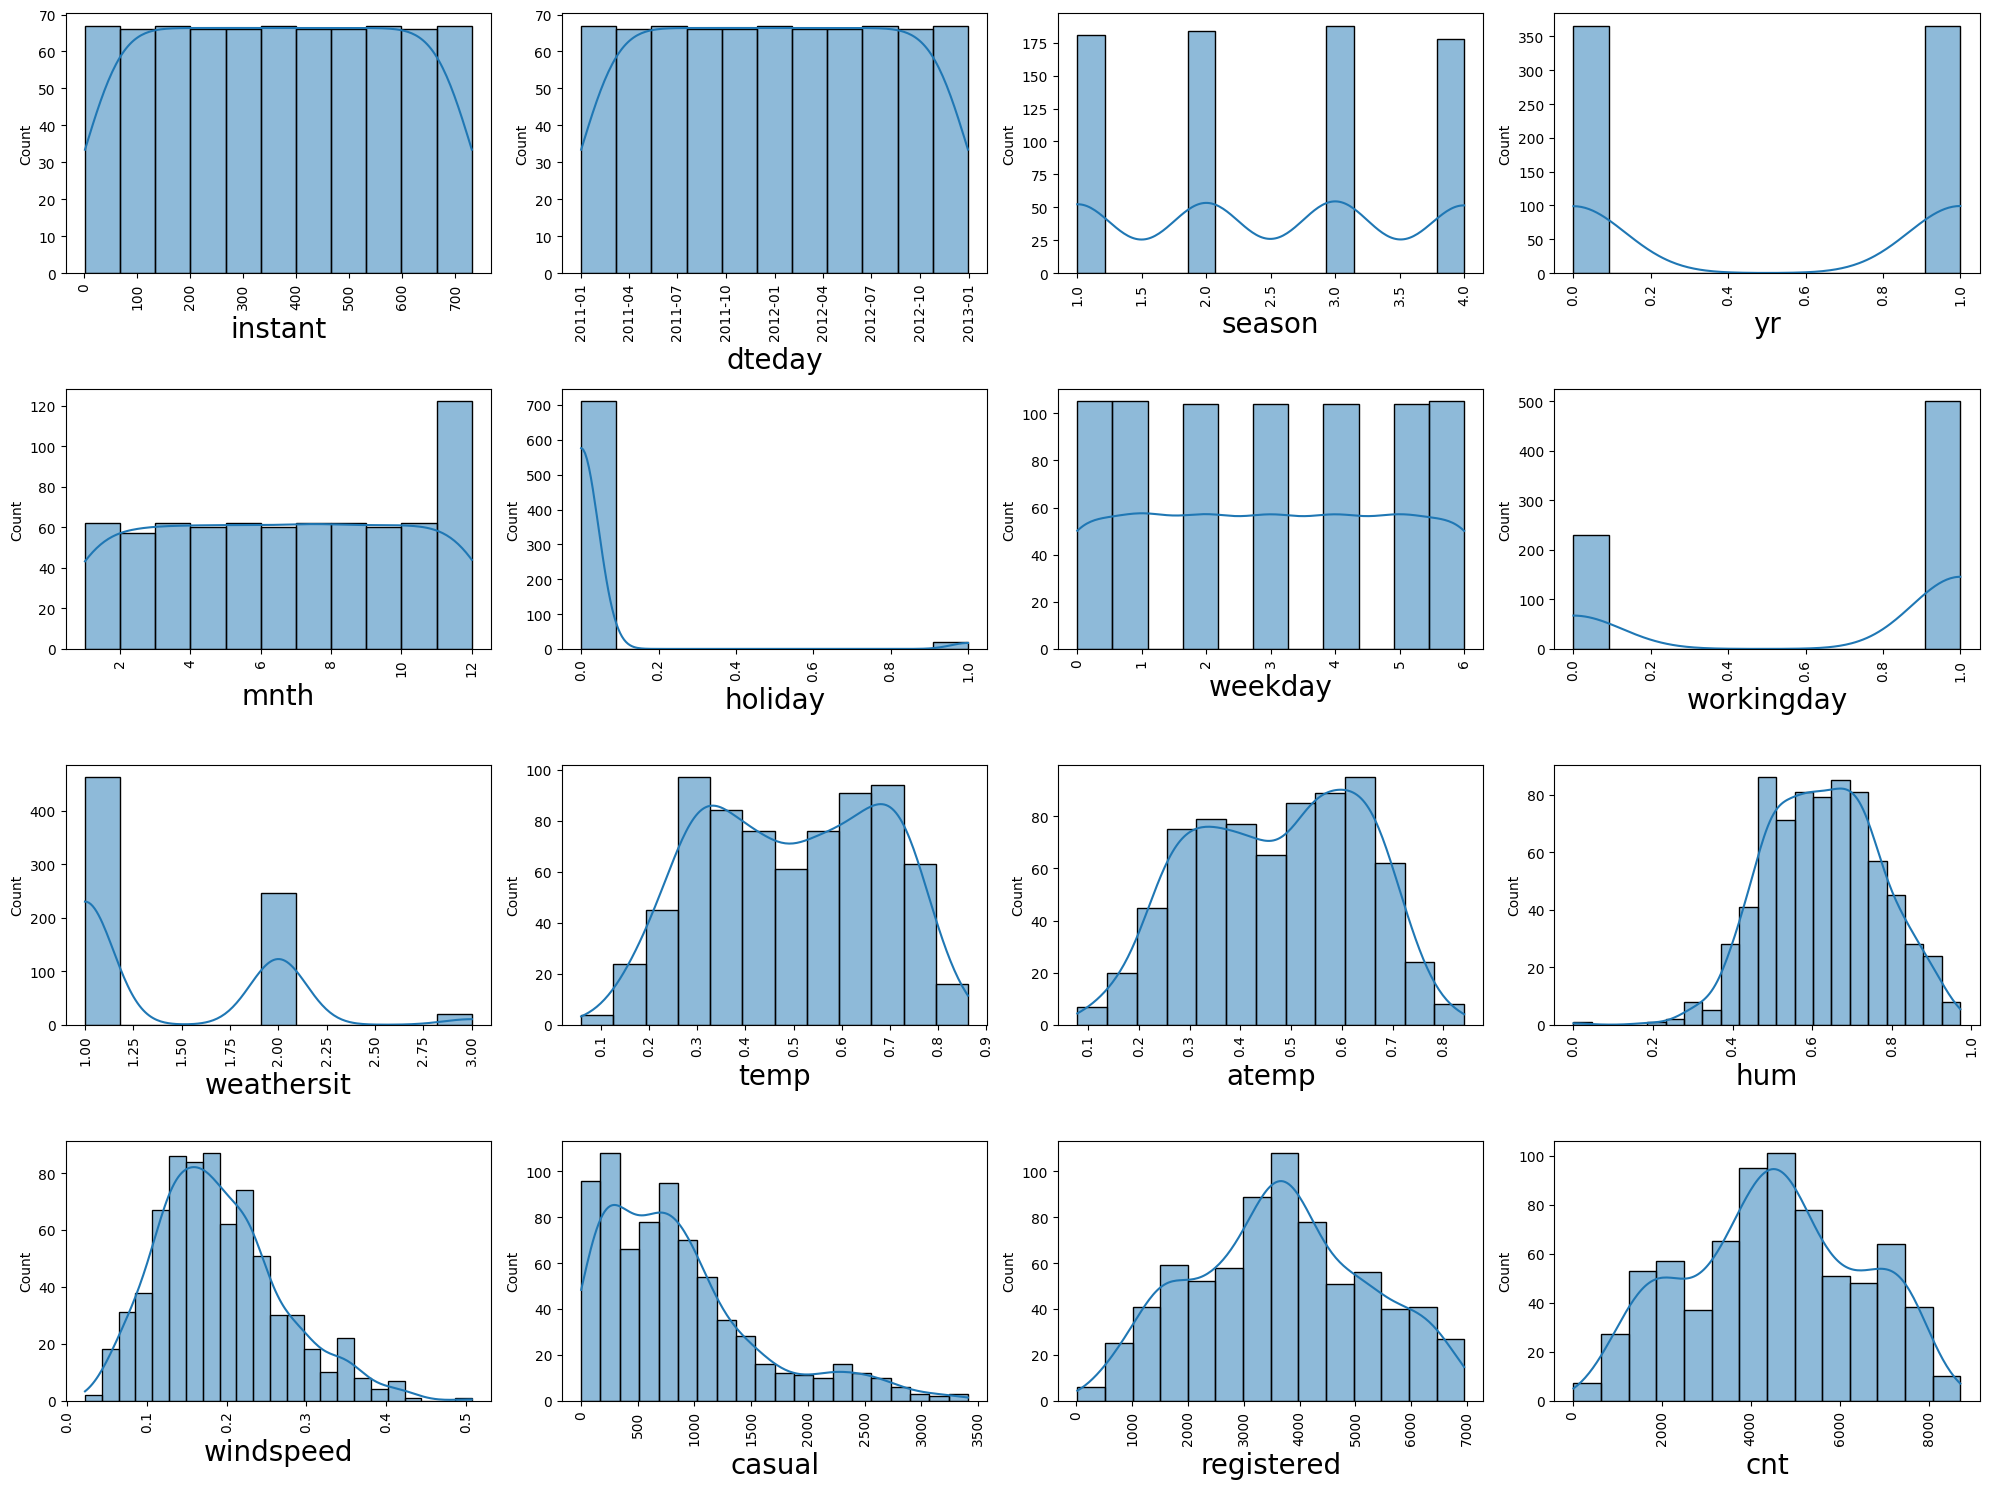

In [11]:
# Univeriant Analysis
plt.figure(figsize=(20,15)) # define the plot size
plt_num = 1
for column in data:
    if plt_num <= 16: # assighn the column value
        plt.subplot(4,4,plt_num) # row and column assighn
        sns.histplot(data[column],kde=True) # create the histogram plot
        plt.xlabel(column,fontsize = 20)
        plt.xticks(rotation = 90)# assighn the xlabel value
    plt_num += 1
plt.tight_layout() # use for data show function

**Insights:-**
* Here we are use histogram plot in continous column.
* Here show the normal distribution in two columns like hum and windspeed after not see any column normal ditribution follow.
* Normal distribution column use mean and not normal distribution column use median.

### Biavariant Analysis

<Axes: xlabel='season', ylabel='cnt'>

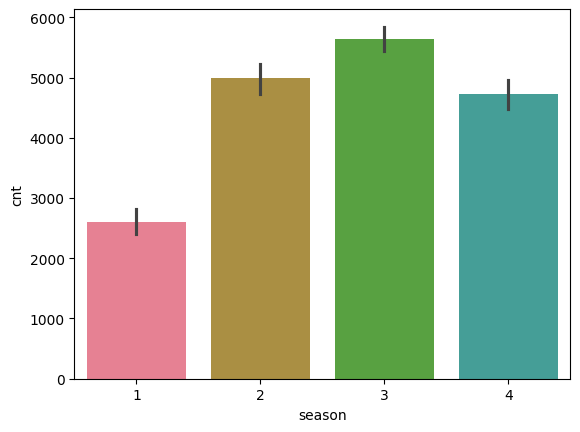

In [12]:
## Biaveriant Analysis
palette = sns.color_palette("husl") # use for bar color create
sns.barplot(x = data.season,y = data.cnt, palette=palette) # create a barplot graph

* Here hightest rent bike in season 3.

<Axes: xlabel='yr', ylabel='cnt'>

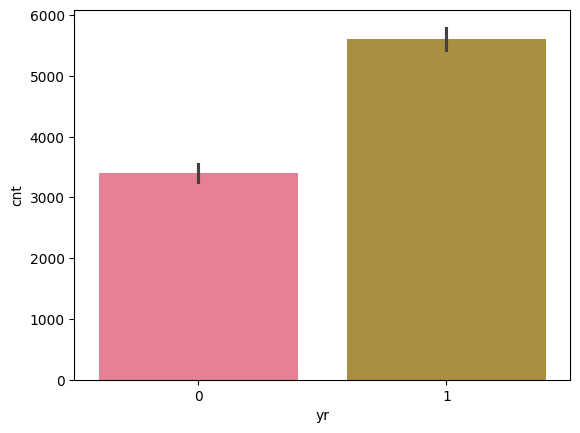

In [13]:
## Biaveriant Analysis
palette = sns.color_palette("husl") # use for bar color create
sns.barplot(x = data.yr,y = data.cnt, palette=palette) # create a barplot graph

* Here highest year 1 means 2012 bike rent.

<Axes: xlabel='mnth', ylabel='cnt'>

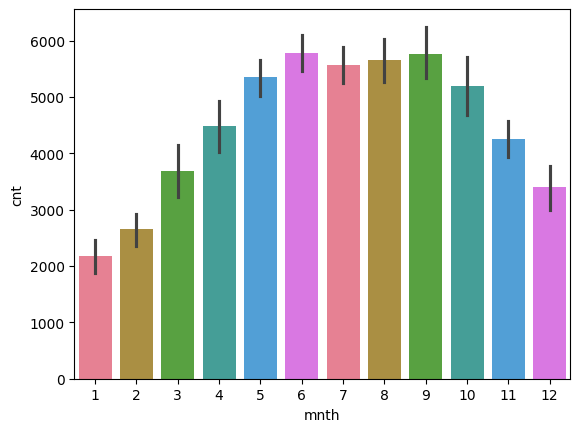

In [14]:
## Biaveriant Analysis
palette = sns.color_palette("husl") # use for bar color create
sns.barplot(x = data.mnth,y = data.cnt,palette=palette) # create a barplot graph

* Here highest bike rent in 5 to 10 month.

<Axes: xlabel='holiday', ylabel='cnt'>

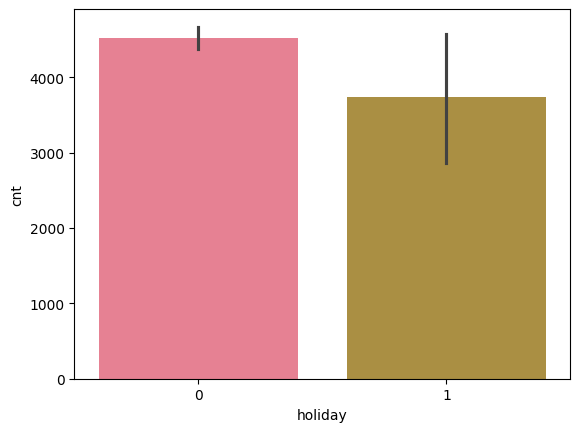

In [15]:
## Biaveriant Analysis
palette = sns.color_palette("husl") # use for bar color create
sns.barplot(x = data.holiday,y = data.cnt, palette=palette) # create a barplot graph

* Here highest bike rent on not holidays.

<Axes: xlabel='weekday', ylabel='cnt'>

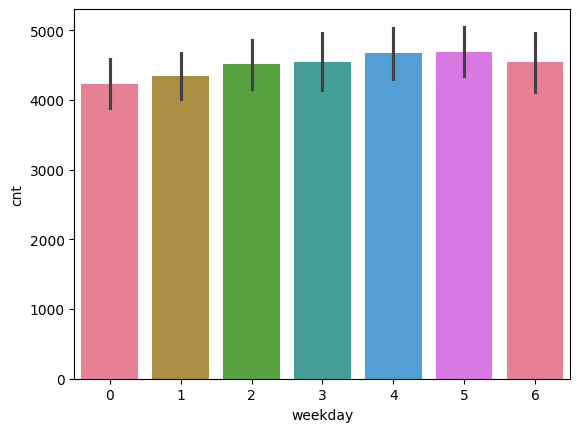

In [16]:
## Biaveriant Analysis
palette = sns.color_palette("husl") # use for bar color create
sns.barplot(x = data.weekday,y = data.cnt, palette=palette) # create a barplot graph

* Here highest bike rent in all days 0 to 6.

<Axes: xlabel='workingday', ylabel='cnt'>

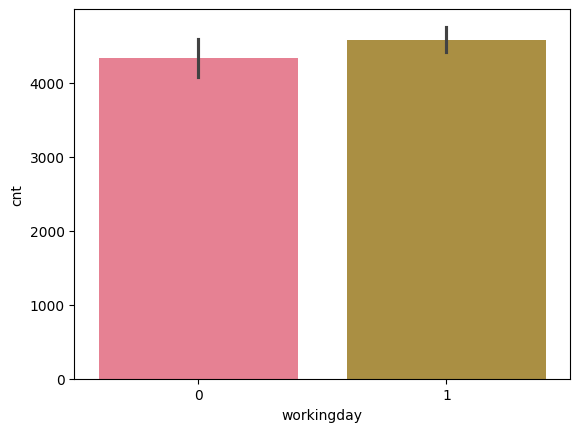

In [17]:
## Biaveriant Analysis
palette = sns.color_palette("husl") # use for bar color create
sns.barplot(x = data.workingday,y = data.cnt, palette=palette) # create a barplot graph

* Here highest bike rent on working days.

<Axes: xlabel='weathersit', ylabel='cnt'>

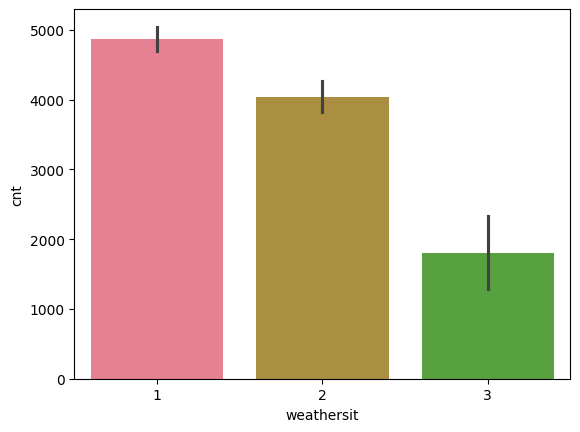

In [18]:
## Biaveriant Analysis
palette = sns.color_palette("husl") # use for bar color create
sns.barplot(x = data.weathersit,y = data.cnt,  palette=palette) # create a barplot graph

* Here highest bike rent on weathersit is 1.

### Multivariant Analysis

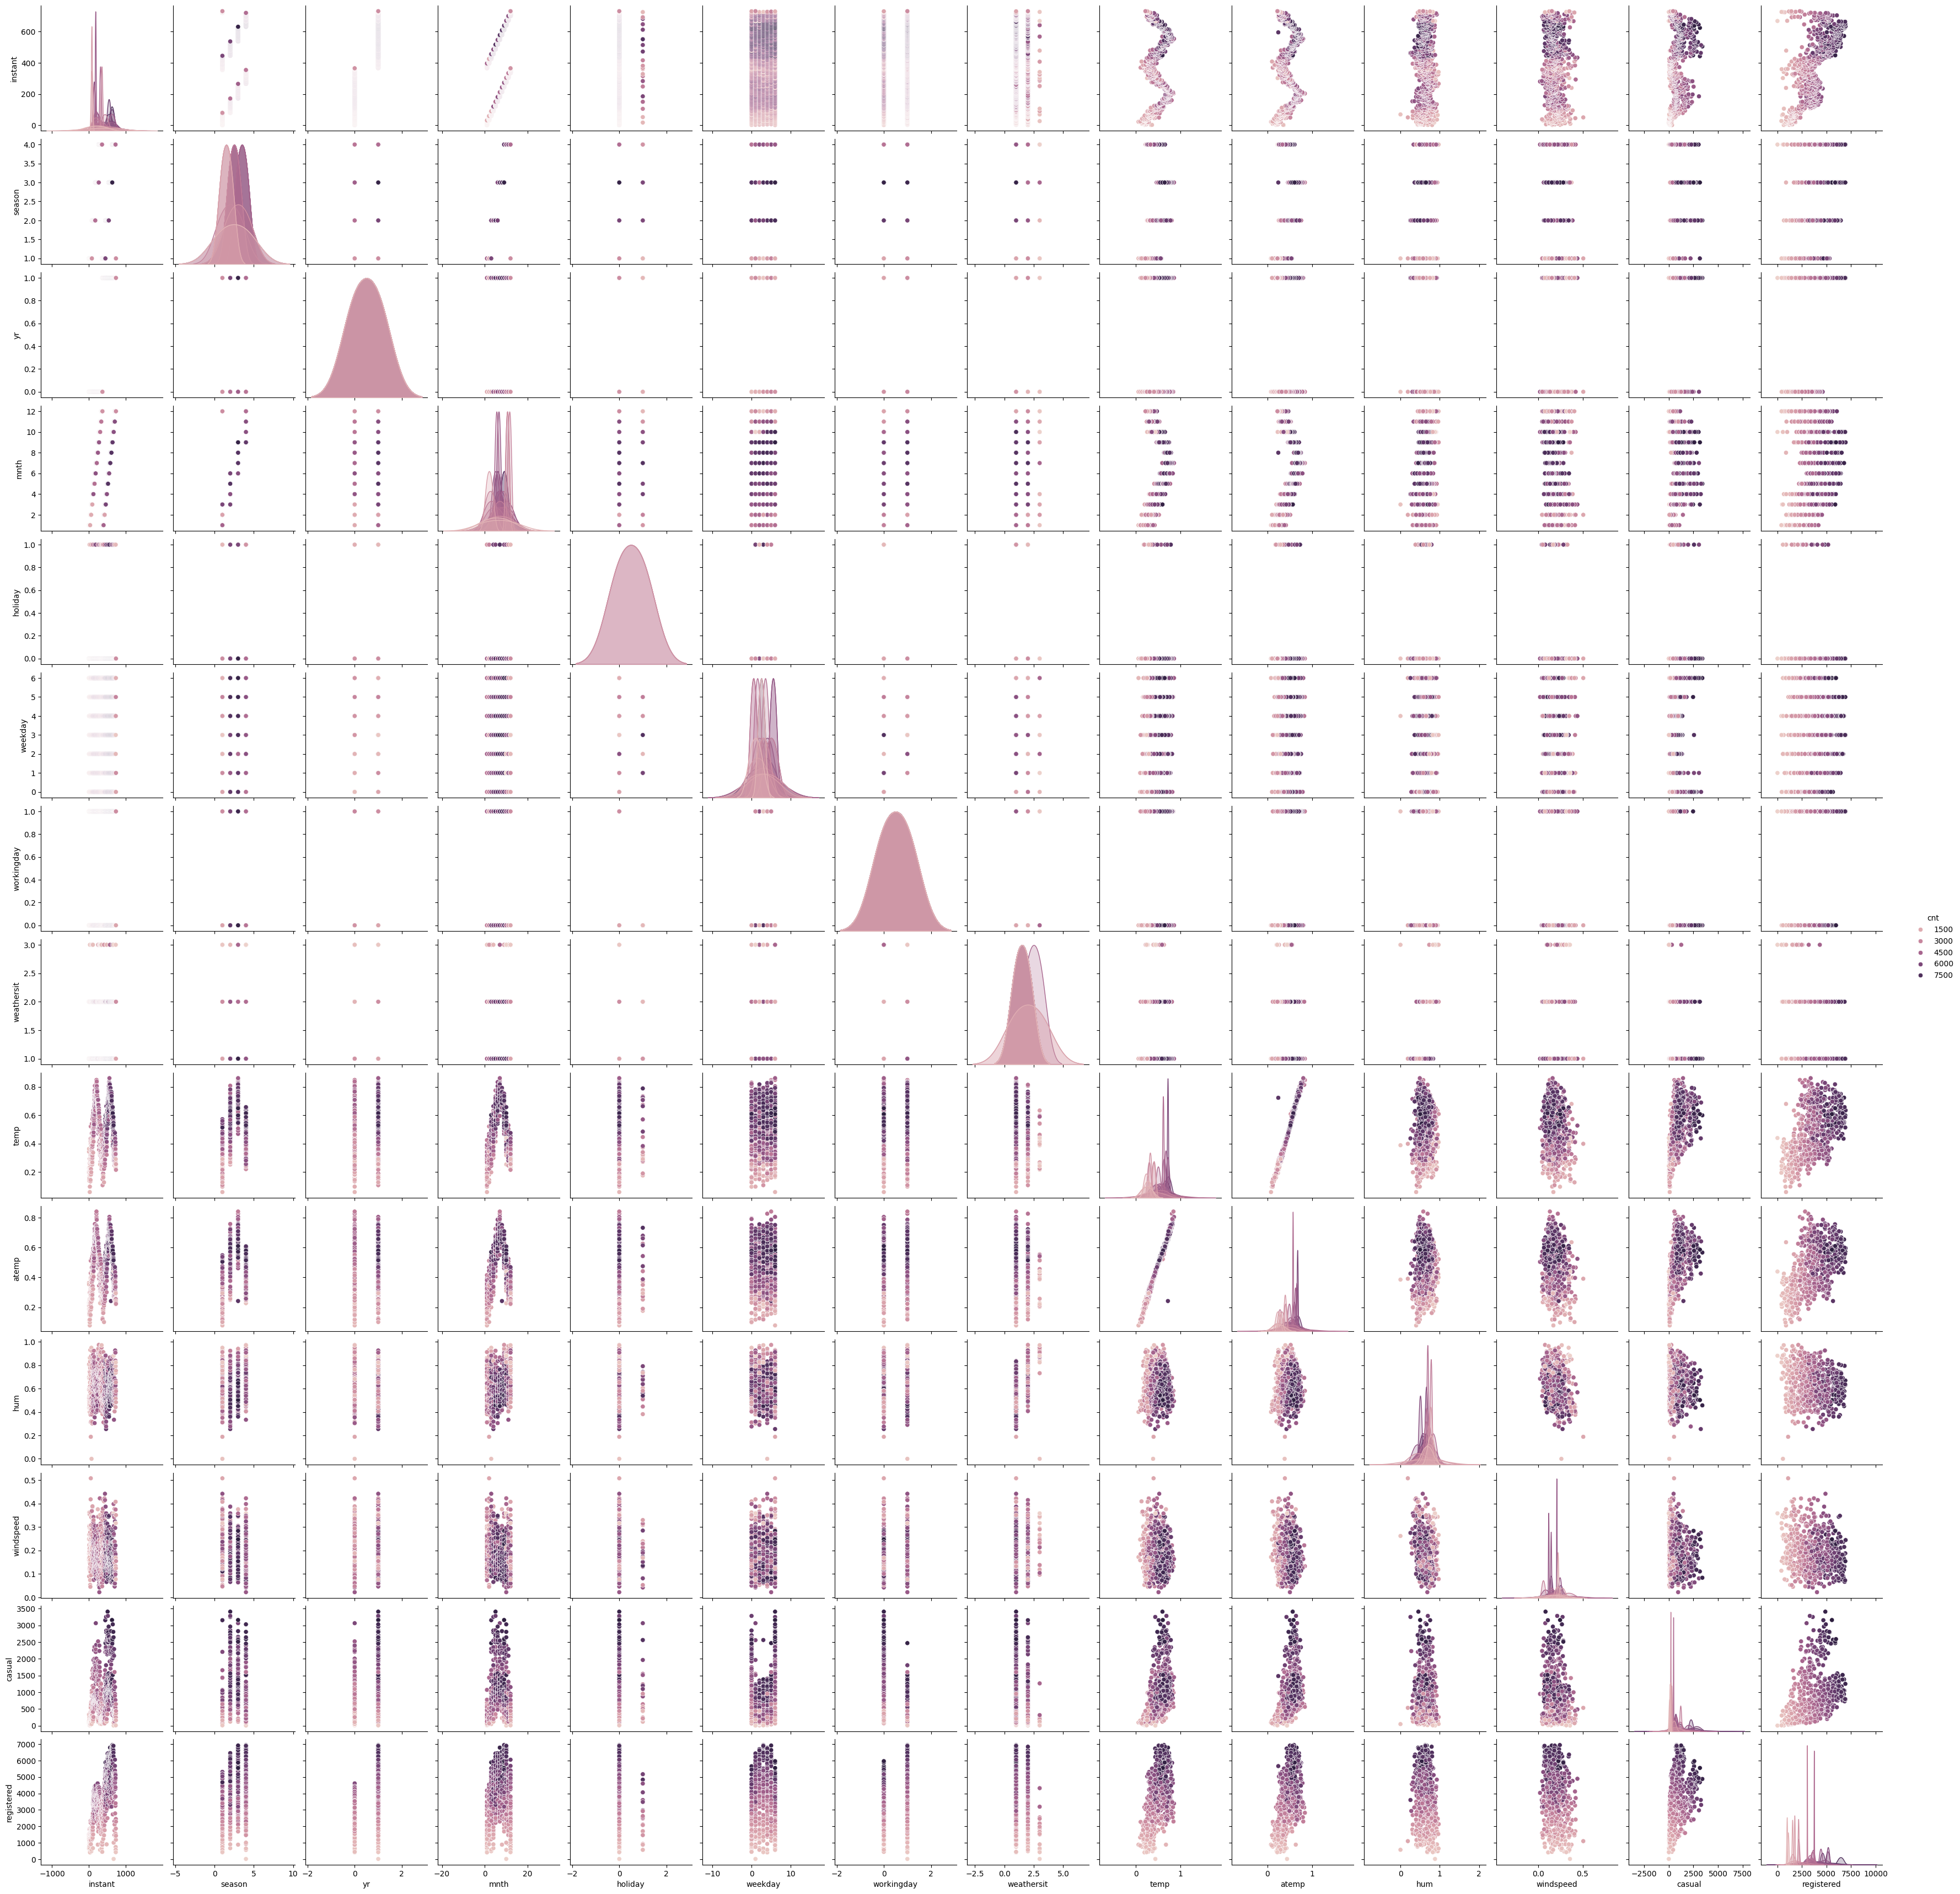

In [19]:
# Multivariant Analysis
sns.pairplot(data,hue="cnt")

* Here we can see the possitive relation between cnt and registred.
* Here we can see the possitive relation between temp and atemp.

* Here we are use histogram plot in continous column.
* Here show the normal distribution in two columns like hum and windspeed after not show any column normal ditribution.
* Normal distribution column use mean and not normal distribution column use median.
* The analysis indicates that bike rentals peak in season 3 and during 2012, with higher usage between the 5th and 10th months and primarily on working days.
* There are positive correlations between total rentals and registered users, as well as between temperature and adjusted temperature.
* These insights suggest a need to optimize bike availability and marketing efforts during these key periods.

## Feature Engineering

**Feature Engineering:-** It is the process of using domain knowledge to select, modify, or create new features from raw data that can improve the performance of machine learning models. It involves transforming raw data into a format that is more suitable for modeling and can significantly impact model accuracy and effectiveness.

#### 1. Data Preprocessing:-

**Data Preprocessing:-** It is the comprehensive set of techniques and processes used to clean, transform, and organize raw data into a suitable format for analysis or machine learning. It is a critical step in the data analysis pipeline that ensures the quality and relevance of the data used for modeling.

In [21]:
data.isnull().sum() # check the null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

* Here we can not see the null values in any columns.

In [22]:
data.head() # showning the top 5 data

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [23]:
# use for create indivisual Day or Year
data["Year"] = pd.to_datetime(data["dteday"]).dt.year # create year column
data["Day"] = pd.to_datetime(data["dteday"]).dt.day  # create day column

In [24]:
data.head() # showning the top 5 data

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  Year  Day  
0   985  2011    1  
1   801  2011    2  
2  1349  2011    3  
3  1562  2011    4  
4  1600  2011    5

In [25]:
# drop this column becuase extract the single feature column create 
data1 = data.drop(["instant","dteday","yr"],axis=1)
data1

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  casual  registered   cnt  Year  Day  
0    0.363625  0.805833   0.160446     331         654   985  2011    1  
1    0.353739  0.696087   0.248539     131         670   801  2011    2  
2    0.189405  0.437273   0.248309     120        1229  1349  2011    3  
3    0.212122  0.590435   0.160296     108        1454  1562  2011    4  
4    0.229270  0.436957   0.186900      82        1518  1600  2011    5  
..        ...       ...        ...     ...         ...   ...   ...  ...  
726  0.226642  0.652917   0.350133     247        1867  2114  2012   27  
727  0.255046  0.590000   0.155471     644        2451  3095  2012   28  
728  0.242400  0.752917   0.124383     159        1182  1341  2012   29  
729  0.231700  0.483333   0.350754     364        1432  1796  2012   30  
730  0.223487  0.577500   0.154846     439        2290  2729  2012   31  

[731 rows x 15 columns]

In [26]:
# use for store only float and int
contious_col = data1.select_dtypes(include=["float64","int64"]) # store float or int value
contious_col

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  casual  registered   cnt  
0    0.363625  0.805833   0.160446     331         654   985  
1    0.353739  0.696087   0.248539     131         670   801  
2    0.189405  0.437273   0.248309     120        1229  1349  
3    0.212122  0.590435   0.160296     108        1454  1562  
4    0.229270  0.436957   0.186900      82        1518  1600  
..        ...       ...        ...     ...         ...   ...  
726  0.226642  0.652917   0.350133     247        1867  2114  
727  0.255046  0.590000   0.155471     644        2451  3095  
728  0.242400  0.752917   0.124383     159        1182  1341  
729  0.231700  0.483333   0.350754     364        1432  1796  
730  0.223487  0.577500   0.154846     439        2290  2729  

[731 rows x 13 columns]

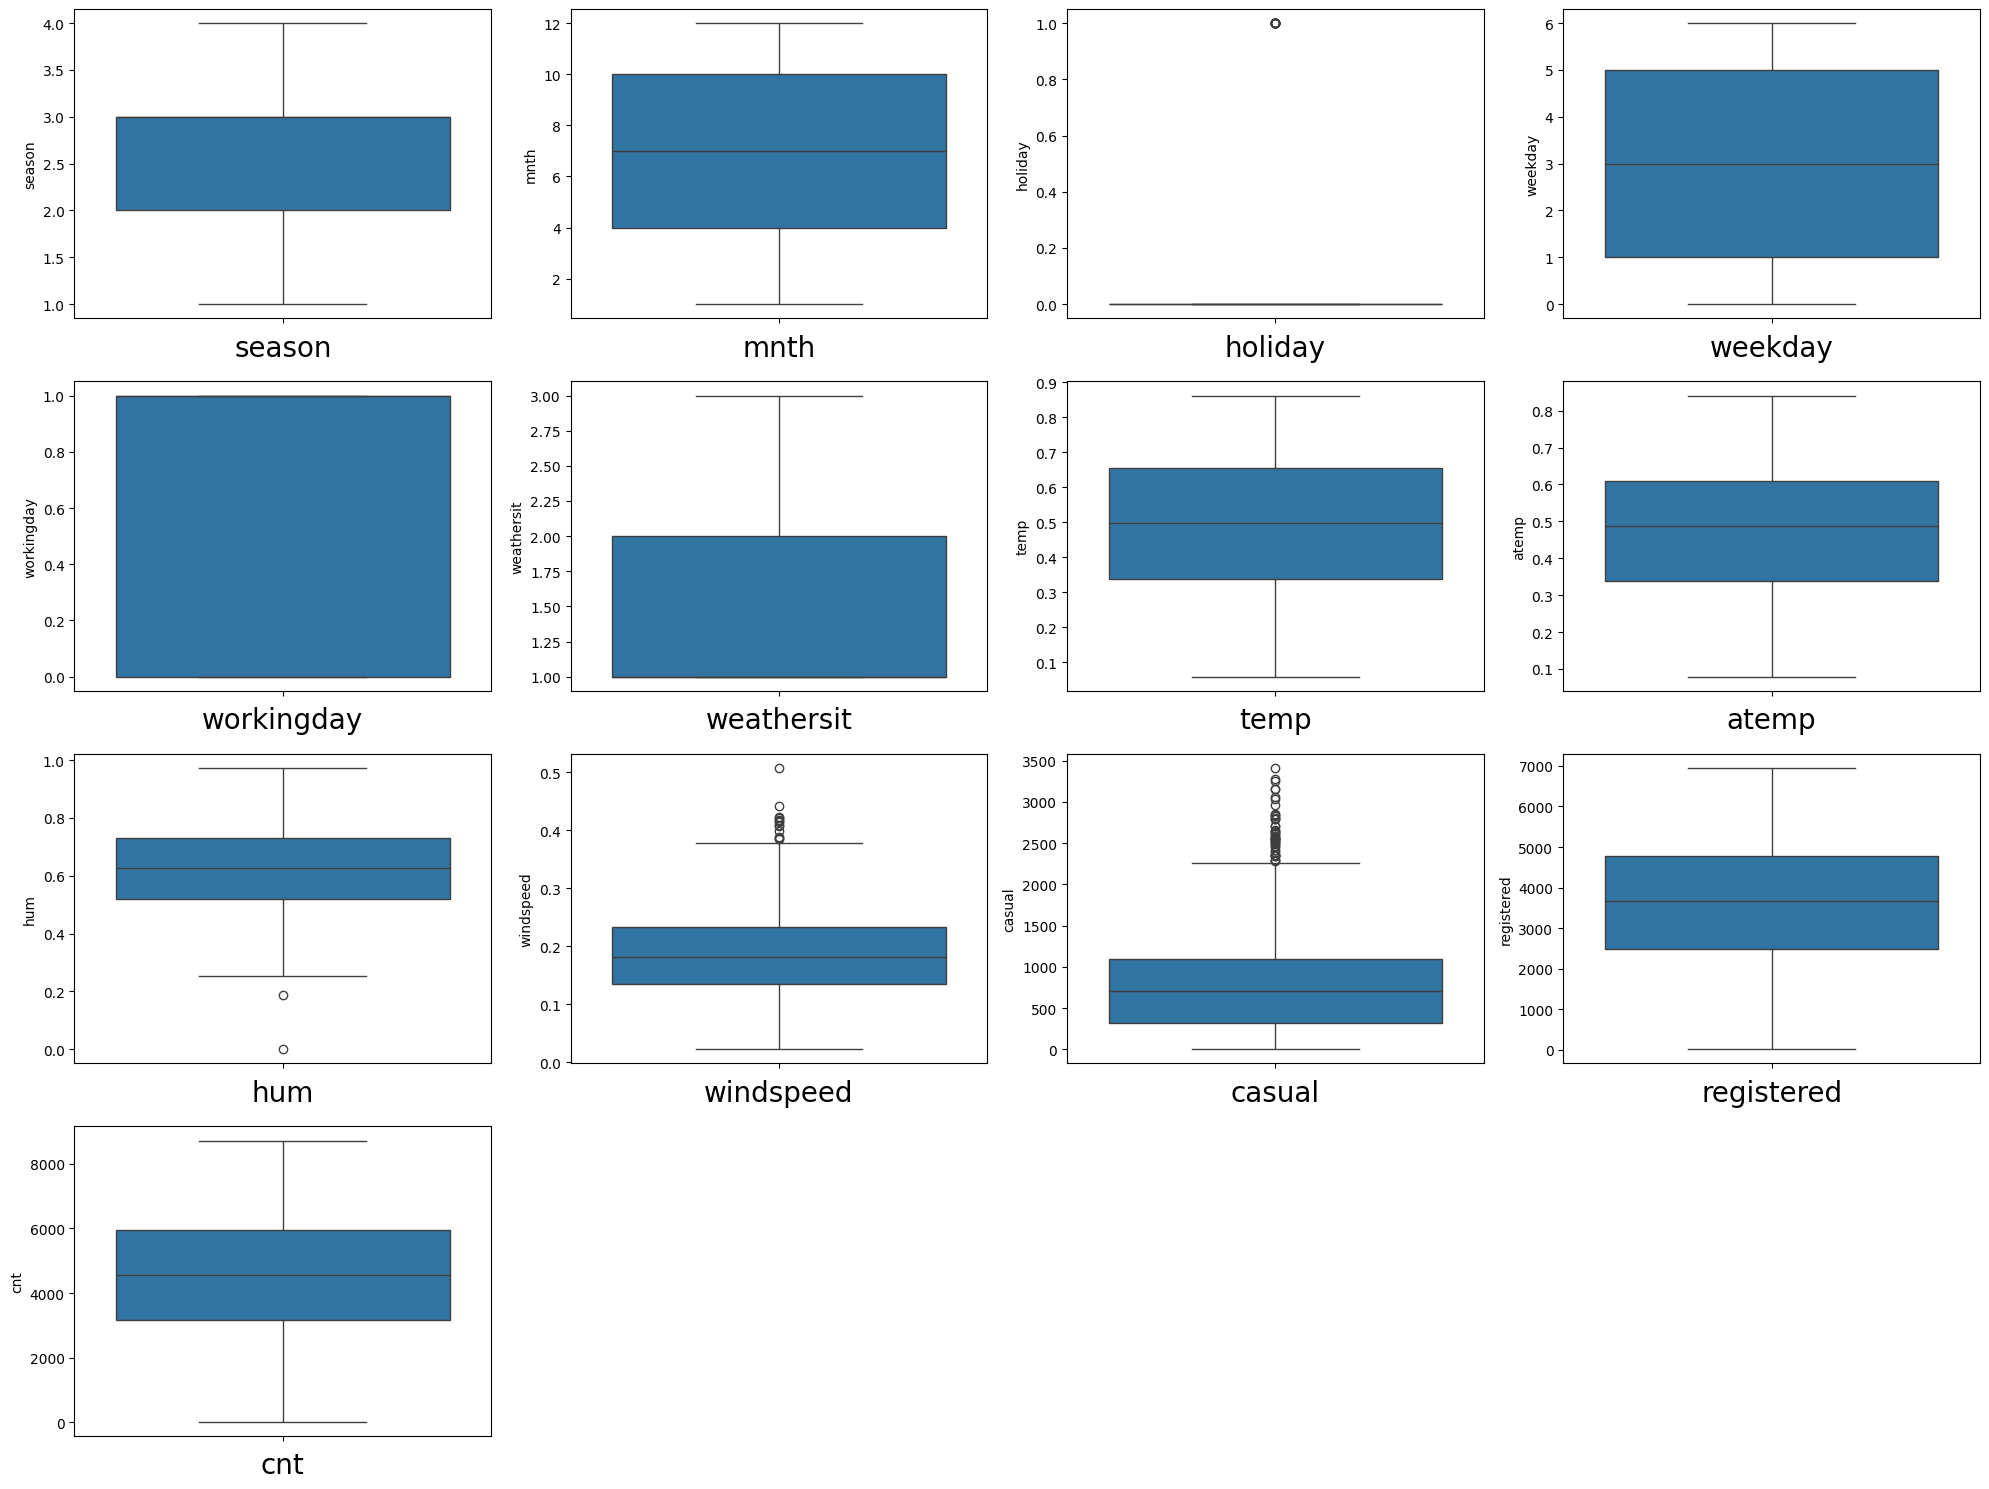

In [27]:
# use for check the outliers in our dataset columns
plt.figure(figsize=(20,15)) # define the plot size
plt_num = 1
for column in contious_col:
    if plt_num <= 13: # assighn the column value
        plt.subplot(4,4,plt_num) # row and column assighn
        sns.boxplot(contious_col[column]) # create the boxplot plot
        plt.xlabel(column,fontsize = 20) # assighn the xlabel value
    plt_num += 1
plt.tight_layout() # use for data show function

* Here we can see the outliers in two columns like windspeed, hum or casual.

<Axes: xlabel='hum'>

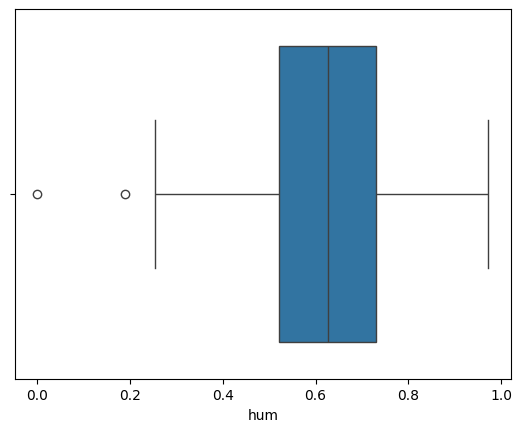

In [28]:
sns.boxplot(x = data1.hum) # check the outliers 

In [29]:
# find the mean because hum column follow the Normal Distribution
data1.hum.mean() # find the mean

0.6278940629274967

In [30]:
data1.loc[data1["hum"] < 0.2,"hum"] = 0.6278940629274967 # handle the outliers value

<Axes: xlabel='hum'>

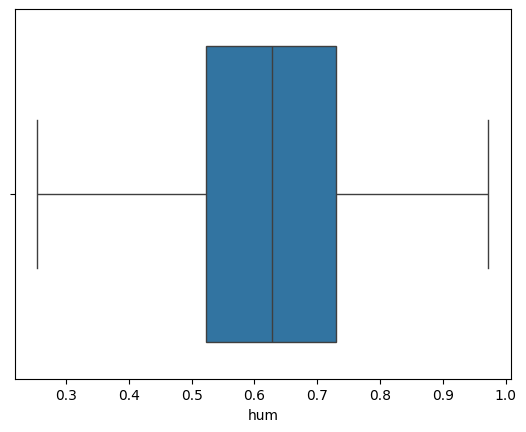

In [31]:
sns.boxplot(x = data1.hum) # check the outliers 

<Axes: xlabel='windspeed'>

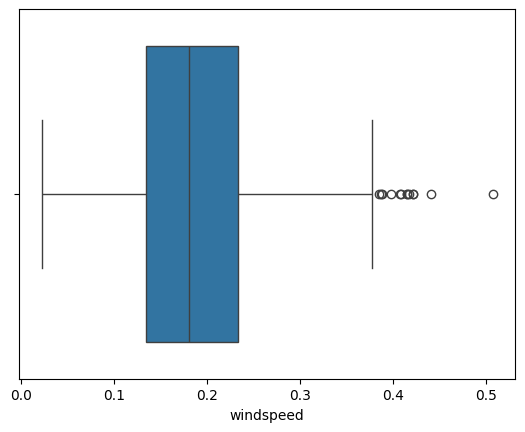

In [32]:
sns.boxplot(x = data1.windspeed) # check the outliers 

In [33]:
# find the mean because windspeed column follow the Normal Distribution
data1.windspeed.mean() # find the mean

0.190486211627907

In [34]:
data1.loc[data1["windspeed"] > 0.36,"windspeed"] = 0.190486211627907 # handle the outliers value

<Axes: xlabel='windspeed'>

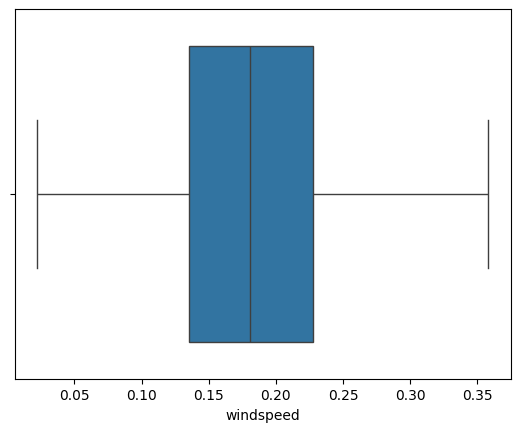

In [35]:
sns.boxplot(x = data1.windspeed) # check the outliers 

<Axes: xlabel='casual'>

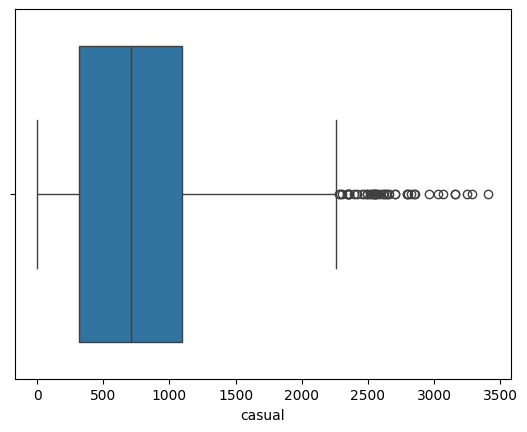

In [36]:
sns.boxplot(x = data1.casual) # check the outliers 

In [37]:
# find the median because casual column not follow the Normal Distribution
data1.casual.median() # find the median

713.0

In [38]:
data1.loc[data1["casual"] > 2600,"casual"] = 713.0 # handle the outliers value

<Axes: xlabel='casual'>

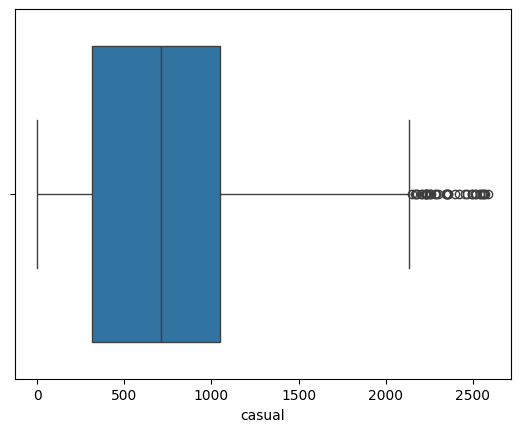

In [39]:
sns.boxplot(x = data1.casual) # check the outliers 

#### 2. Feature Selection

**Feature Selection:-** It is the process of identifying and selecting a subset of relevant features (variables, predictors) from a larger set of available features in a dataset. The goal of feature selection is to improve the performance of machine learning models by retaining only the most important and informative features, while eliminating redundant or irrelevant ones.

<Axes: >

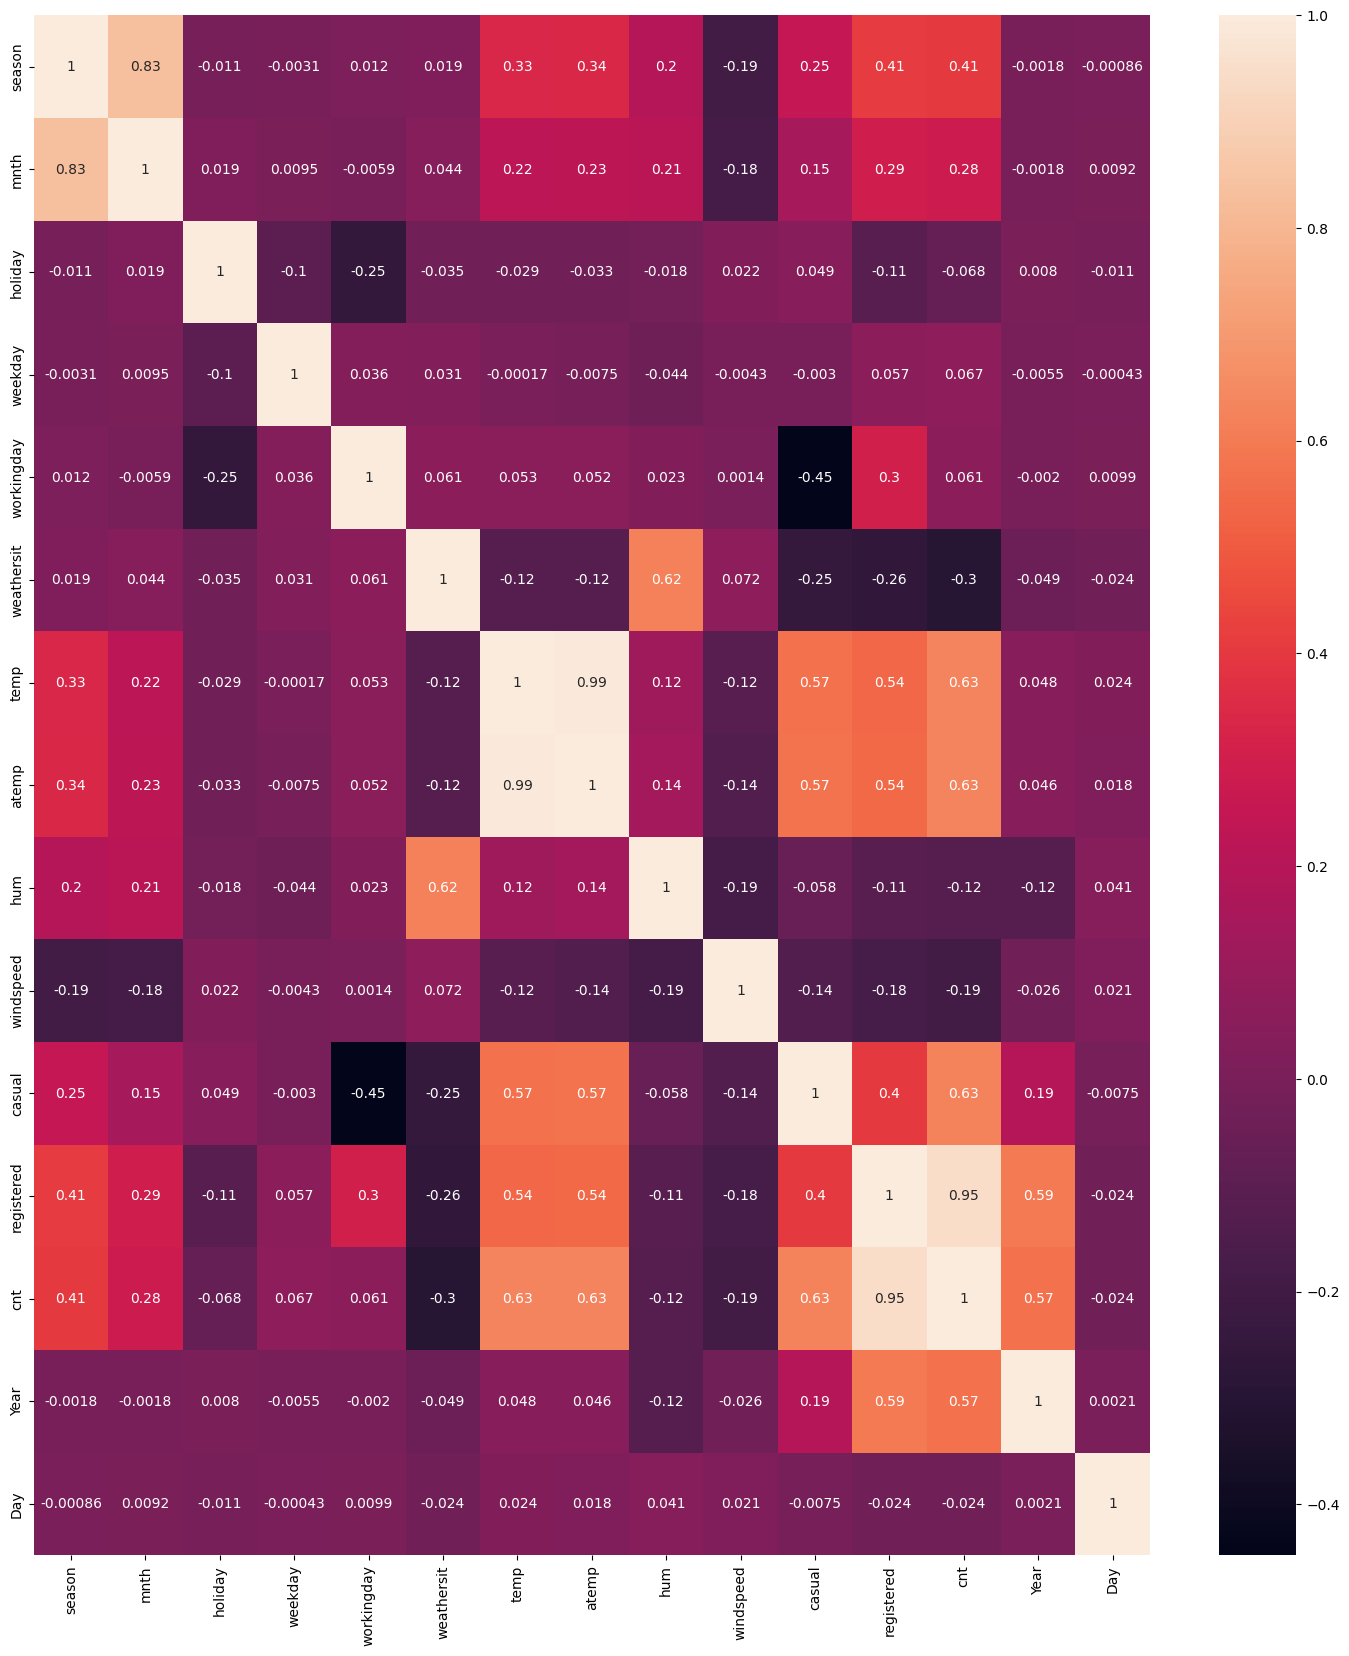

In [40]:
plt.figure(figsize=(18,20)) # define the plot size
sns.heatmap(data1.corr(),annot=True) # craete a heatmap check the relationship

* Here check the relation between the columns then the column relation which is more than 90 can be removed.
* Here we can see the high corelation between temp and atemp after we can drop the atemp column featuers.

In [41]:
data2 = data1.drop(["atemp","registered"],axis=1) # drop the column high corelation
data2

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

          hum  windspeed  casual   cnt  Year  Day  
0    0.805833   0.160446     331   985  2011    1  
1    0.696087   0.248539     131   801  2011    2  
2    0.437273   0.248309     120  1349  2011    3  
3    0.590435   0.160296     108  1562  2011    4  
4    0.436957   0.186900      82  1600  2011    5  
..        ...        ...     ...   ...   ...  ...  
726  0.652917   0.350133     247  2114  2012   27  
727  0.590000   0.155471     644  3095  2012   28  
728  0.752917   0.124383     159  1341  2012   29  
729  0.483333   0.350754     364  1796  2012   30  
730  0.577500   0.154846     439  2729  2012   31  

[731 rows x 13 columns]

**Insights:-**
* Here we can see the high corelation between temp and atemp after we can drop the atemp column featuers.

## Model Selection Process

In [42]:
x = data1.drop("cnt",axis=1) # create the independent variable
y = data1.cnt  # create the dependent variable

In [43]:
x  # Show the independent variable

season  mnth  holiday  weekday  workingday  weathersit      temp  \
0         1     1        0        6           0           2  0.344167   
1         1     1        0        0           0           2  0.363478   
2         1     1        0        1           1           1  0.196364   
3         1     1        0        2           1           1  0.200000   
4         1     1        0        3           1           1  0.226957   
..      ...   ...      ...      ...         ...         ...       ...   
726       1    12        0        4           1           2  0.254167   
727       1    12        0        5           1           2  0.253333   
728       1    12        0        6           0           2  0.253333   
729       1    12        0        0           0           1  0.255833   
730       1    12        0        1           1           2  0.215833   

        atemp       hum  windspeed  casual  registered  Year  Day  
0    0.363625  0.805833   0.160446     331         654  2011    1  
1    0.353739  0.696087   0.248539     131         670  2011    2  
2    0.189405  0.437273   0.248309     120        1229  2011    3  
3    0.212122  0.590435   0.160296     108        1454  2011    4  
4    0.229270  0.436957   0.186900      82        1518  2011    5  
..        ...       ...        ...     ...         ...   ...  ...  
726  0.226642  0.652917   0.350133     247        1867  2012   27  
727  0.255046  0.590000   0.155471     644        2451  2012   28  
728  0.242400  0.752917   0.124383     159        1182  2012   29  
729  0.231700  0.483333   0.350754     364        1432  2012   30  
730  0.223487  0.577500   0.154846     439        2290  2012   31  

[731 rows x 14 columns]

In [44]:
y  # Show the dependent variable

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [45]:
# use for traning and testing data use library is train_test_split
from sklearn.model_selection import train_test_split # import the train test split model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40) # create a train test split

In [46]:
x_train # check the spliting trainig data

season  mnth  holiday  weekday  workingday  weathersit      temp  \
462       2     4        0        6           0           1  0.437500   
331       4    11        0        1           1           1  0.503478   
166       2     6        0        4           1           2  0.628333   
106       2     4        0        0           0           1  0.456667   
719       4    12        0        4           1           2  0.330000   
..      ...   ...      ...      ...         ...         ...       ...   
440       1     3        0        5           1           2  0.435833   
165       2     6        0        3           1           1  0.626667   
7         1     1        0        6           0           2  0.165000   
219       3     8        0        1           1           1  0.765000   
326       4    11        0        3           1           2  0.440833   

        atemp       hum  windspeed  casual  registered  Year  Day  
462  0.426129  0.254167   0.274871     713        3605  2012    7  
331  0.490122  0.743043   0.142122     253        3614  2011   28  
166  0.595346  0.688333   0.206471     545        3222  2011   16  
106  0.445696  0.479583   0.303496    1558        2186  2011   17  
719  0.335217  0.667917   0.132463     314        3814  2012   20  
..        ...       ...        ...     ...         ...   ...  ...  
440  0.436229  0.842083   0.113192     548        3830  2012   16  
165  0.587754  0.471667   0.167912     769        4411  2011   15  
7    0.162254  0.535833   0.266804      68         891  2011    8  
219  0.703283  0.592083   0.192175     846        3480  2011    8  
326  0.430537  0.757917   0.335825     112        2454  2011   23  

[584 rows x 14 columns]

In [47]:
x_test  # check the spliting testing data

season  mnth  holiday  weekday  workingday  weathersit      temp  \
120       2     5        0        0           0           2  0.451667   
498       2     5        0        0           0           1  0.612500   
450       2     3        0        1           1           1  0.445833   
556       3     7        0        2           1           2  0.720833   
188       3     7        0        5           1           2  0.709167   
..      ...   ...      ...      ...         ...         ...       ...   
423       1     2        0        2           1           1  0.359167   
140       2     5        0        6           0           1  0.602500   
62        1     3        0        5           1           2  0.261667   
304       4    11        0        2           1           1  0.400833   
313       4    11        0        4           1           2  0.380000   

        atemp       hum  windspeed  casual  registered  Year  Day  
120  0.448204  0.762083   0.106354    1138        2213  2011    1  
498  0.585238  0.576250   0.225117    2172        3946  2012   13  
450  0.438750  0.477917   0.190486     795        4763  2012   26  
556  0.664796  0.667500   0.151737     954        5336  2012   10  
188  0.670483  0.757917   0.225129     692        3348  2011    8  
..        ...       ...        ...     ...         ...   ...  ...  
423  0.353525  0.395833   0.193417     229        4134  2012   28  
140  0.571975  0.626667   0.120650    2258        3547  2011   21  
62   0.255679  0.610417   0.203346     214        1730  2011    4  
304  0.397088  0.683750   0.135571     410        3658  2011    1  
313  0.373721  0.813333   0.189067     190        2743  2011   10  

[147 rows x 14 columns]

## Model Creation:- Linear Regression Algorithm

In [48]:
# use for linear regression model of continous data problem
from sklearn.linear_model import LinearRegression # import linear regression model
LR = LinearRegression() # call the lr model
LR.fit(x_train,y_train) # train the model

LinearRegression()

In [49]:
y_lr = LR.predict(x_test) # predcit the test data

In [50]:
y_lr  # predcit the test data

array([3448.46434292, 6063.94939993, 5550.72496854, 6405.86473566,
       4110.5575617 , 1493.69401863, 5559.51569849, 5137.33316318,
       4812.38641803, 3299.26242863, 4030.88364533, 4675.92175661,
       3636.17535452, 5535.35257681, 3939.88275936, -223.87539712,
       5148.42092947, 6437.51579028, 7124.12254887, 6517.27599637,
       5214.12224481, 3778.42481558, 3564.24208509, 1729.91752444,
       7516.60691721, 7753.99101968, 2501.55095678, 1350.84582687,
       7425.2775788 , 6752.07351382, 3766.67099059, 3924.09897075,
       3290.81687901, 6203.45575165, 4884.52262507, 1762.38238651,
       3458.20009283, 7071.14983044, 3814.1313649 , 4408.4841369 ,
       3189.93837536, 4006.79799177, 6959.80922429, 3043.61056628,
       3647.27245005, 7481.92233497, 3655.09790352, 2485.85139125,
       4379.39383873, 2336.0360341 , 5209.50394117, 4921.88459714,
       2589.56963202,  901.28015396, 7542.86576945, 2990.09592455,
       6043.1354286 , 4327.55016219, 7605.51689956, 1168.49222

In [51]:
y_test  # actual the test data

120    3351
498    6118
450    5558
556    6290
188    4040
       ... 
423    4363
140    5805
62     1944
304    4068
313    2933
Name: cnt, Length: 147, dtype: int64

In [52]:
# use for check the linear regression model performance
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error  # import the linear regression metrics

In [53]:
r2_1 = r2_score(y_test,y_lr) # check the model performace
r2_1

0.9852366741445656

In [54]:
mse1 = mean_squared_error(y_test,y_lr) # check the squared error
mse1

49116.010810354004

In [55]:
mb1 = mean_absolute_error(y_test,y_lr) # check the absolute error value
mb1

146.8562291478163

In [56]:
y_trlr = LR.predict(x_train) # predict the train data

In [57]:
r2_score(y_train,y_trlr) # check the model performace

0.9718264527012398

In [58]:
error1 = y_test - y_lr # check the error value
error1

120    -97.464343
498     54.050600
450      7.275031
556   -115.864736
188    -70.557562
          ...    
423   -184.777647
140     41.120168
62     148.596880
304    111.898945
313    105.197224
Name: cnt, Length: 147, dtype: float64

<Axes: xlabel='cnt', ylabel='Count'>

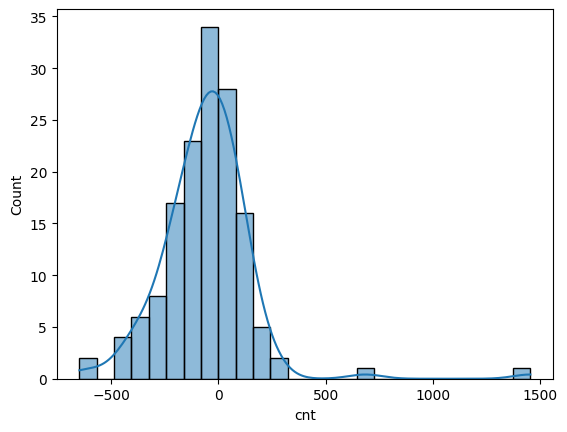

In [59]:
sns.histplot(x = error1,kde=True) # show the error value in plot

**Insights:-**
* Here we can see the linear Regression model show the generalized model.
* Error also show the Normal Distribution
* Linear Regression Model r2_score is 0.98 that not required the Hyperparamter Model use.

## SVM:- Support Vectore Machine

In [60]:
from sklearn.svm import SVR # import the svr model
svr = SVR() # call the svr model
svr.fit(x_train,y_train) # train the model

SVR()

In [61]:
y_svr = svr.predict(x_test) # predict the test data

In [62]:
r2_2 = r2_score(y_test,y_svr)  # check the model performace
r2_2

0.07436027647961319

In [63]:
mse2 = mean_squared_error(y_test,y_svr) # check the squared error
mse2

3079504.6530917822

In [64]:
mb2 = mean_absolute_error(y_test,y_svr) # check the absolute error value
mb2

1415.714753172047

In [65]:
y_trsvr = svr.predict(x_train) # predict the trainig data

In [66]:
r2_score(y_train,y_trsvr) # check the trainig data performance

0.07407389751001026

In [67]:
error10 = y_test - y_svr  # check the error value
error10 

120   -1130.635117
498    1525.419066
450     938.825691
556    1642.186208
188    -494.268179
          ...     
423    -211.225605
140    1232.768811
62    -2505.762077
304    -480.428525
313   -1559.285677
Name: cnt, Length: 147, dtype: float64

In [68]:
from sklearn.model_selection import GridSearchCV # used for create combination  to paramter 
model1 = SVR() # call the SVR model
grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}
gsc = GridSearchCV(estimator=model1,param_grid=grid,cv = 5,scoring="r2",n_jobs=-1,verbose=1) # Call the Gridsearchcv
gsc.fit(x_train,y_train) # train the model

'from sklearn.model_selection import GridSearchCV # used for create combination  to paramter \nmodel1 = SVR() # call the SVR model\ngrid = {\n    \'C\': [0.1, 1, 10, 100],         # Regularization parameter\n    \'gamma\': [\'scale\', \'auto\', 0.001, 0.01, 0.1, 1],  # Kernel coefficient\n    \'kernel\': [\'linear\', \'rbf\', \'poly\']  # Kernel type\n}\ngsc = GridSearchCV(estimator=model1,param_grid=grid,cv = 5,scoring="r2",n_jobs=-1,verbose=1) # Call the Gridsearchcv\ngsc.fit(x_train,y_train) # train the model'

#### Report SVM Model:-
* Here SVM is not run as svm hyperparameter tuning takes a lot of time.

In [69]:
y_hrsvr = gsc.predict(x_test) # used for predict the test data

In [70]:
r2_score(y_test,y_hrsvr) # check the model performance

In [71]:
y_trhrsvr = gsc.predict(x_train) # predict the traning data

In [72]:
r2_score(y_train,y_trhrsvr) # check the model performacne

<Axes: xlabel='cnt', ylabel='Count'>

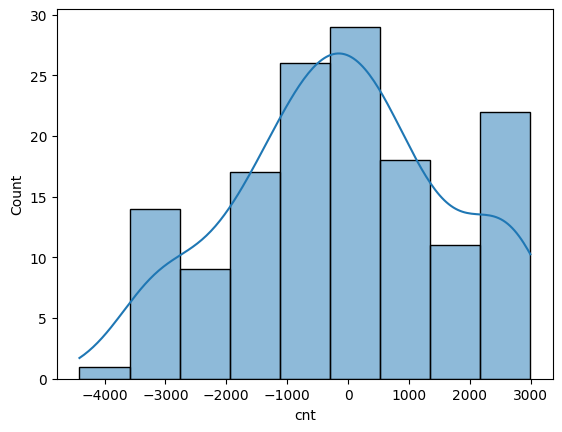

In [73]:
sns.histplot(x = error10,kde=True)  # show the error value in plot 

**Conclusion:-**
* Here we can see the Support Vectore Machine is Generalized Model based on test r2_score is 0.07 and training r2_score is 0.07.
* Error also not show the Normal Distribution.
* SVM Model r2_score is 0.07 after that required the Hyperparamter Model use.

## Desicion Tree Algorithm

In [74]:
from sklearn.tree import DecisionTreeRegressor # import the DT model
DT = DecisionTreeRegressor(random_state = 100,max_depth= 10) # call the DT model
DT.fit(x_train,y_train) # train the model

DecisionTreeRegressor(max_depth=10, random_state=100)

In [75]:
y_dt = DT.predict(x_test) # predict the test data

In [76]:
r2_3 = r2_score(y_test,y_dt)  # check the model performace
r2_3

0.9825592442987047

In [77]:
mean_absolute_error(y_test,y_dt) # check the mean absolute error

167.23331615474473

In [78]:
mse3 = mean_squared_error(y_test,y_dt)  # check the mean squared error value
mse3

58023.53439555358

In [79]:
mb3 = mean_absolute_error(y_test,y_dt) # check the absolute error value
mb3

167.23331615474473

In [80]:
y_trdt = DT.predict(x_train)  # predict the train data

In [81]:
r2_score(y_train,y_trdt)  # check the model performace

0.9989585732721821

In [82]:
error2 = y_test - y_dt  # check the error value
error2 

120   -393.000000
498     77.000000
450    149.000000
556   -280.500000
188   -596.305556
          ...    
423    -12.000000
140    487.333333
62      72.000000
304     94.000000
313    -72.000000
Name: cnt, Length: 147, dtype: float64

<Axes: xlabel='cnt', ylabel='Count'>

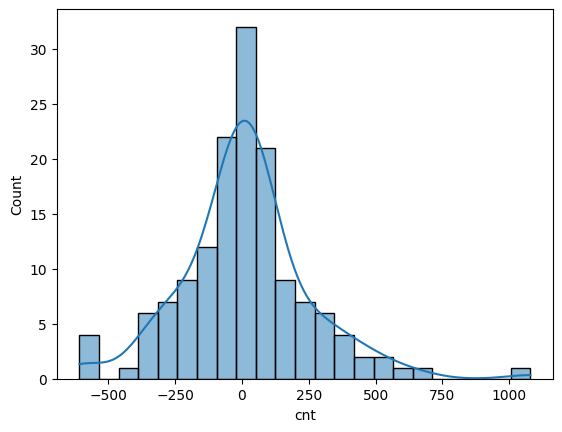

In [83]:
sns.histplot(x = error2,kde=True)  # show the error value in plot

**Insights:-**
* Here we can see the Descision Tree Algorithm is Generalized Model based on test r2_score is 0.98 and training r2_score is 0.99.
* Error also show the Normal Distribution.
* Descision Tree Model r2_score is 0.98 after that not required the Hyperparamter Model use.

## KNN:- K Nearest Neigbour

In [84]:
from sklearn.neighbors import KNeighborsRegressor # import the KNN model
KNN = KNeighborsRegressor() # call the KNN model
KNN.fit(x_train,y_train)  # train the model

KNeighborsRegressor()

In [85]:
y_knn = KNN.predict(x_test) # predict the test data

In [86]:
r2_4 = r2_score(y_test,y_knn)  # check the model performace
r2_4

0.9768230067479826

In [87]:
mse4 = mean_squared_error(y_test,y_knn)  # check the mean squared error value
mse4

77107.3850340136

In [88]:
mb4 = mean_absolute_error(y_test,y_knn) # check the absolute error value
mb4

125.19455782312927

In [89]:
y_trknn = KNN.predict(x_train) # predict the traning data

In [90]:
r2_score(y_train,y_trknn) # check the trainig data performance

0.9745204156978029

In [91]:
error9 = y_test - y_knn # check the error value
error9

120      35.4
498     -34.8
450   -1551.2
556      -1.8
188    -495.2
        ...  
423     -91.4
140      80.2
62        2.2
304     -11.4
313     -50.2
Name: cnt, Length: 147, dtype: float64

<Axes: xlabel='cnt', ylabel='Count'>

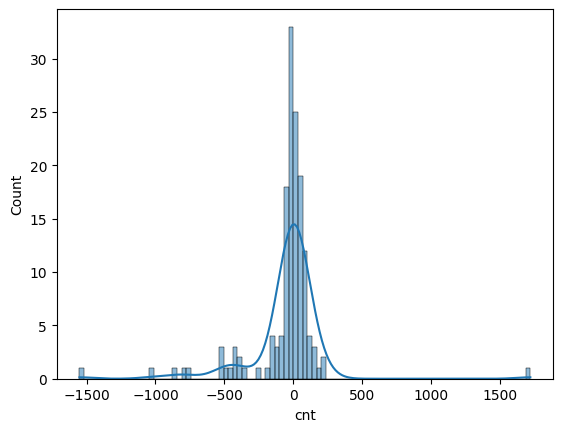

In [92]:
sns.histplot(x = error9,kde=True) # error value show in plot

**Insights:-**
* Here we can see the KNN Algorithm is Generalized Model based on test r2_score is 0.97 and training r2_score is 0.97.
* Error also show the Normal Distribution.
* KNN Algorithm Model r2_score is 0.97 after that not required the Hyperparamter Model use.

## Bagging Algorithm

In [93]:
from sklearn.ensemble import BaggingRegressor # import the BG model
BG = BaggingRegressor() # call BG model
BG.fit(x_train,y_train)  # train the model

BaggingRegressor()

In [94]:
y_bg = BG.predict(x_test) # predict the test data

In [95]:
r2_5 = r2_score(y_test,y_bg)  # check the model performace
r2_5

0.9934514634292967

In [96]:
mse5 = mean_squared_error(y_test,y_bg)  # check the mean squared error value
mse5

21786.282857142865

In [97]:
mb5 = mean_absolute_error(y_test,y_bg) # check the absolute error value
mb5

97.13877551020408

In [98]:
y_trbg = BG.predict(x_train) # predict the train data

In [99]:
r2_score(y_train,y_trbg) # check the model performance

0.9974828847269563

In [100]:
error8 = y_test - y_bg # check the error value
error8

120     85.7
498     13.4
450     32.8
556     -2.2
188    -95.3
       ...  
423    -21.3
140    219.2
62     -82.8
304      1.9
313   -136.2
Name: cnt, Length: 147, dtype: float64

<Axes: xlabel='cnt', ylabel='Count'>

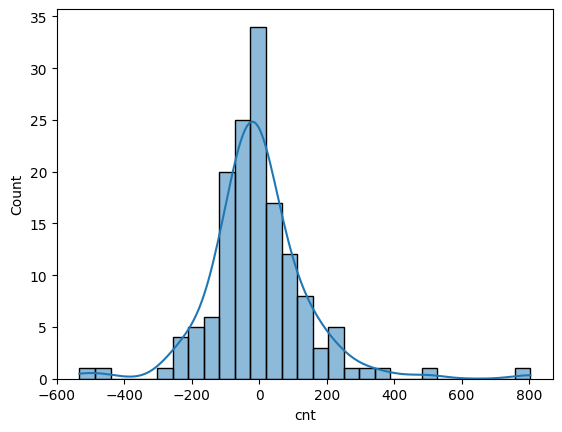

In [101]:
sns.histplot(x = error8,kde=True) # error value show in plot

**Insights:-**
* Here we can see the Bagging Algorithm is Overfiting Model based on test r2_score is 0.99 and training r2_score is 100.0.
* Error also show the Normal Distribution.
* Bagging Model r2_score is 0.99 after that required the Hyperparamter Model use.

## RandomForest Algorithm

In [102]:
from sklearn.ensemble import RandomForestRegressor # import the RM model
RM = RandomForestRegressor() # call RM model
RM.fit(x_train,y_train)  # train the model

RandomForestRegressor()

In [103]:
y_rm = RM.predict(x_test)  # predict the test data

In [104]:
r2_6 = r2_score(y_test,y_rm)  # check the model performace
r2_6

0.9944470109890146

In [105]:
mse6 = mean_squared_error(y_test,y_rm)  # check the mean squared error value
mse6

18474.202287755103

In [106]:
mb6 = mean_absolute_error(y_test,y_rm) # check the absolute error value
mb6

92.85272108843539

In [107]:
y_trrm = RM.predict(x_train) # predict the train data

In [108]:
r2_score(y_train,y_trrm)  # check the trainig data performance

0.9983602364588332

In [109]:
error5 = y_test - y_rm # check the error value
error5

120     95.45
498    137.68
450    -76.00
556    -46.45
188   -183.11
        ...  
423    -83.71
140    303.38
62     -19.93
304     16.06
313   -101.56
Name: cnt, Length: 147, dtype: float64

<Axes: xlabel='cnt', ylabel='Count'>

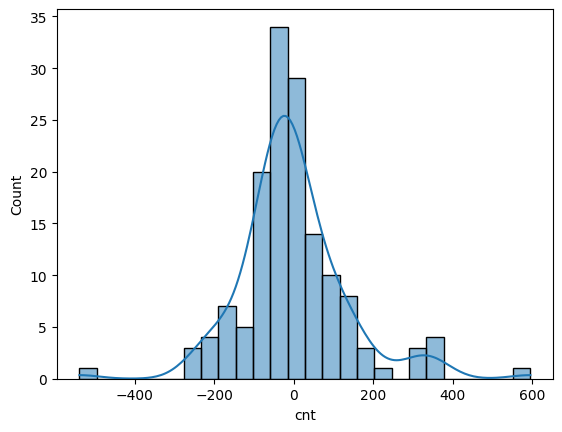

In [110]:
sns.histplot(x = error5,kde=True) # error value show in plot

**Insights:-**
* Here we can see the Random Forest Algorithm is Generalized Model based on test r2_score is 0.99 and training r2_score is 0.99.
* Error also show the Normal Distribution.
* Random Forest Model r2_score is 0.99 after that not required the Hyperparamter Model use.

## Gradiant Boosting Algorithm

In [111]:
from sklearn.ensemble import GradientBoostingRegressor # import the gb model
GB = GradientBoostingRegressor() # call GB model
BG.fit(x_train,y_train)  # train the model

BaggingRegressor()

In [112]:
y_bg = BG.predict(x_test)  # predict the test data

In [113]:
r2_7 = r2_score(y_test,y_bg)  # check the model performace
r2_7

0.9917560243460835

In [114]:
mse7 = mean_squared_error(y_test,y_bg)  # check the mean squared error value
mse7

27426.827891156467

In [115]:
mb7 = mean_absolute_error(y_test,y_bg) # check the absolute error value
mb7

109.14965986394557

In [116]:
y_trbg = BG.predict(x_train) # predict the train the data

In [117]:
r2_score(y_train,y_trbg) # check the model Performance

0.9971646631900337

In [118]:
error3 = y_test - y_bg # check the error value
error3

120    161.9
498    -27.6
450     78.4
556   -142.3
188    -39.5
       ...  
423    110.3
140     49.7
62     -26.9
304     30.6
313   -154.5
Name: cnt, Length: 147, dtype: float64

<Axes: xlabel='cnt', ylabel='Count'>

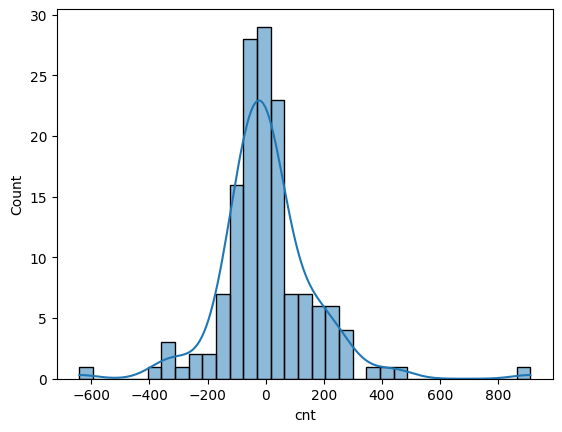

In [119]:
sns.histplot(x = error3,kde=True) # error value based on plot the graph

**Insights:-**
* Here we can see the Gradiant Boosting Algorithm is Generalized Model based on test r2_score is 0.99 and training r2_score is 0.99.
* Error also show the Normal Distribution.
* Boosting Model r2_score is 0.99 after that not required the Hyperparamter Model use.

## Xtrame Gradiant Boosting

In [120]:
from xgboost import XGBRegressor # Import the XGB model
XGB = XGBRegressor() # call XGB model
XGB.fit(x_train,y_train)  # train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [121]:
y_xgb = XGB.predict(x_test)  # predict the test data

In [122]:
r2_8 = r2_score(y_test,y_xgb)  # check the model performace
r2_8

0.9943707585334778

In [123]:
mse8 = mean_squared_error(y_test,y_xgb)  # check the mean squared error value
mse8

18727.885870393697

In [124]:
mb8 = mean_absolute_error(y_test,y_xgb) # check the absolute error value
mb8

90.99462475419855

In [125]:
y_trxgb = XGB.predict(x_train) # predict the train the data

In [126]:
r2_score(y_train,y_trxgb) # check the model Performance

0.9999985098838806

In [127]:
error4 = y_test - y_xgb # check the error value 
error4

120    272.542969
498    -97.866211
450   -129.258301
556    -45.284180
188    -50.322754
          ...    
423     -5.900391
140    309.684082
62      -1.879395
304    -42.854492
313     16.408203
Name: cnt, Length: 147, dtype: float64

<Axes: xlabel='cnt', ylabel='Count'>

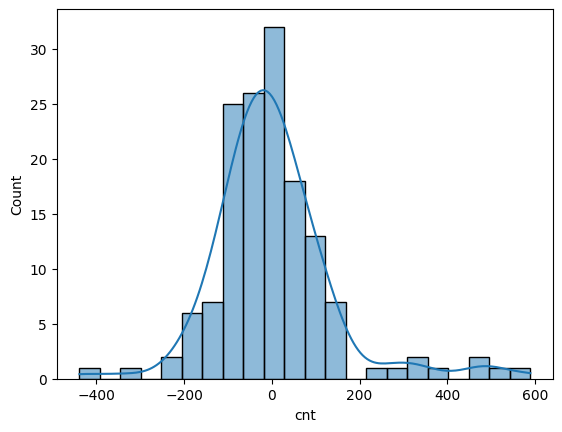

In [128]:
sns.histplot(x = error4,kde=True) # error value based on plot the graph

**Insights:-**
* Here we can see the Xtream Gradiant Boosting Algorithm is Generalized Model based on test r2_score is 0.99 and training r2_score is 0.99.
* Error also show the Normal Distribution.
* Xtream Gradiant Boosting Model r2_score is 0.99 after that not required the Hyperparamter Model use.

## Ada Boosting Algorithm

In [129]:
from sklearn.ensemble import AdaBoostRegressor # import the ADA model
ADA = AdaBoostRegressor() # call the ADA model
ADA.fit(x_train,y_train)  # train the model

AdaBoostRegressor()

In [130]:
y_ada = ADA.predict(x_test)  # predict the test data

In [131]:
r2_9 = r2_score(y_test,y_ada)  # check the model performace
r2_9

0.9515212350444842

In [132]:
mse9 = mean_squared_error(y_test,y_ada)  # check the mean squared error value
mse9

161283.68139698356

In [133]:
mb9 = mean_absolute_error(y_test,y_ada) # check the absolute error value
mb9

337.10214884210353

In [134]:
y_trada = ADA.predict(x_train)  # predict the training data

In [135]:
r2_score(y_train,y_trada)   # check the trainig data performance

0.9598180201968758

In [136]:
error7 = y_test - y_ada # check the error value between actual data and predicted data
error7

120     -6.215385
498    384.071856
450   -536.319588
556   -416.306818
188   -702.614458
          ...    
423   -175.618056
140    440.941176
62    -330.513514
304   -417.967742
313   -531.420000
Name: cnt, Length: 147, dtype: float64

<Axes: xlabel='cnt', ylabel='Count'>

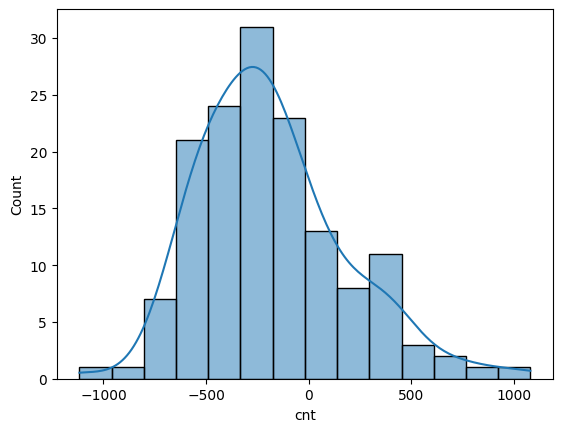

In [137]:
# use for check Normal Distribution
sns.histplot(x=error7, kde=True) # show the error value histogram plot

**Insights:-**
* Here we can see the Adda Gradiant Boosting Algorithm is Generalized Model based on test r2_score is 0.95 and training r2_score is 0.96.
* Error also show the Normal Distribution.
* Adda Gradiant Boosting Model r2_score is 0.95 after that not required the Hyperparamter Model use.

## ANN:- Artificial Neural Network  

In [138]:
from sklearn.neural_network import MLPRegressor # import the ANN model
ANN = MLPRegressor() # call the Ann  Model
ANN.fit(x_train,y_train)  # train the model

MLPRegressor()

In [139]:
y_ann = ANN.predict(x_test)  # predict the test data

In [140]:
r2_10 = r2_score(y_test,y_ann)  # check the model performace
r2_10

0.9885252977665793

In [141]:
mse10 = mean_squared_error(y_test,y_ann) # check the average of error value
mse10

38175.110707512395

In [142]:
mb10 = mean_absolute_error(y_test,y_ann) # check the absolute error value
mb10

105.80207333344003

In [143]:
y_trann = ANN.predict(x_train)  # predict the train data

In [144]:
r2_score(y_train,y_trann)  # check the model performace

0.960976287145788

In [145]:
error6 = y_test - y_ann  # check the error value between actual data and predicted data
error6

120    -23.955130
498     25.119808
450   -221.900269
556   -158.810860
188   -117.717987
          ...    
423   -123.718712
140     33.925760
62      61.847762
304   -101.912347
313    -14.465442
Name: cnt, Length: 147, dtype: float64

<Axes: xlabel='cnt', ylabel='Count'>

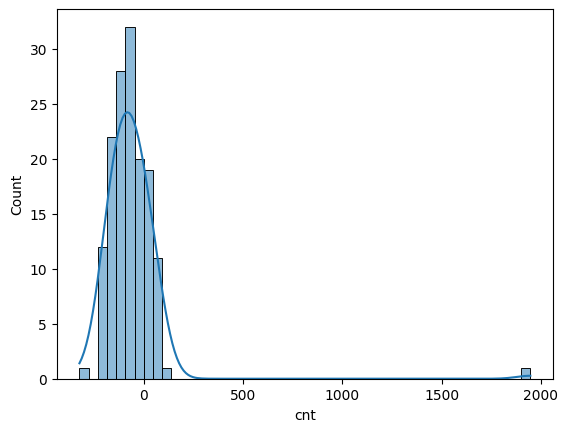

In [146]:
# use for check Normal Distribution
sns.histplot(x = error6,kde=True)  # show the error value histogram plot

**Insights:-**
* Here we can see the ANN Algorithm is Generalized Model based on test r2_score is 0.98 and training r2_score is 0.96.
* Error also show the Normal Distribution.
* ANN Model r2_score is 0.96 after that not required the Hyperparamter Model use.

## Model Comparison Report

In [147]:
# check the all algorithm model perforamnce in table form
# check the Model name, r2_score, mean_squer_error, mean_absolute_error
score = pd.DataFrame({"Model":["LinearRegression","SVM","DecisionTreeRegressor","KNN","Bagging","RandomForestRegressor","GradiantBoosting","XGBRegressor","AdaBoosting","ANN_MLPRegressor"],
                     "r2_score":[r2_1*100,r2_2*100,r2_3*100,r2_4*100,r2_5*100,r2_6*100,r2_7*100,r2_8*100,r2_9*100,r2_10*100],
                     "MSE":[mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8,mse9,mse10],
                     "MAE":[mb1,mb2,mb3,mb4,mb5,mb6,mb7,mb8,mb9,mb10]})
score

Model   r2_score           MSE          MAE
0       LinearRegression  98.523667  4.911601e+04   146.856229
1                    SVM   7.436028  3.079505e+06  1415.714753
2  DecisionTreeRegressor  98.255924  5.802353e+04   167.233316
3                    KNN  97.682301  7.710739e+04   125.194558
4                Bagging  99.345146  2.178628e+04    97.138776
5  RandomForestRegressor  99.444701  1.847420e+04    92.852721
6       GradiantBoosting  99.175602  2.742683e+04   109.149660
7           XGBRegressor  99.437076  1.872789e+04    90.994625
8            AdaBoosting  95.152124  1.612837e+05   337.102149
9       ANN_MLPRegressor  98.852530  3.817511e+04   105.802073

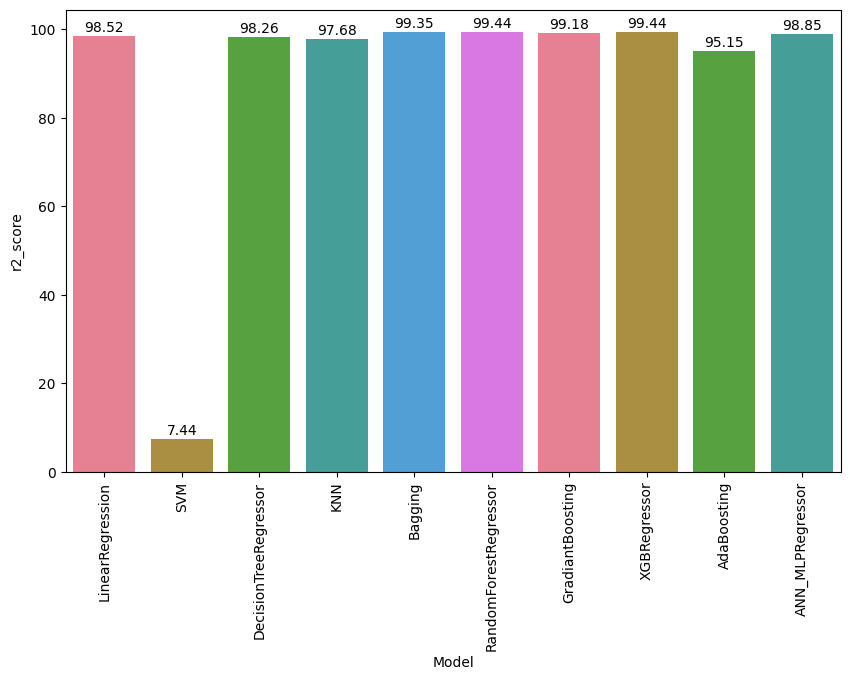

In [148]:
# use for All model performance show in barplot graph
palette = sns.color_palette("husl") # define the color for barplot 
plt.figure(figsize=(10, 6)) # define the plot size
plt.xticks(rotation = 90) # show the x axis value rotation
a = sns.barplot(x=score.Model, y=score.r2_score, data=score, palette=palette) # create the barplot

for index, value in enumerate(score['r2_score']): # show indivisual bar values show
    a.text(index, value + 1, f'{value:.2f}', ha='center')

* I have used total 10 Algorithm like LinearRegression, SVM, DecisionTreeRegressor, KNN, Bagging, RandomForestRegressor, GradientBoosting, XGBRegressor, AdaBoosting, ANN_MLPRegressor.
* Best Algorithm is XGBRegressor and RandomForestRegressor beacause Hight r2_score is 99.44 and mean squared error is 1.92.
* Most of algorithm provide the accuracy_score is 99.37 plus.
* Most of algorithm error valuse show the Normal Distribution.
* Most of the algorithm inside not use the hyperparameter model beacuse most of model generalized model.

* The analysis of the bike rental dataset reveals that it contains 731 entries and 16 columns, with 15 input features and 1 target variable.
* Among the columns, there are 4 float data types and 1 object type, while one column is incorrectly classified as an object instead of a datetime type.
* The dataset presents challenges due to the presence of multiple outliers across various columns and does not exhibit a normal distribution for all features.
* Additionally, the feature selection process identified strong relationships among several columns, leading to the decision to drop some of them.
* Two models experienced overfitting issues, which were addressed to improve generalization. Lastly, the Support Vector Machine (SVM) algorithm initially showed low performance, but after hyperparameter tuning, its effectiveness was significantly enhanced. Overall, these insights highlight the importance of careful data preprocessing and model optimization in improving predictive performance.